In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.image as mpimg
import seaborn as sns
import math

from sklearn.utils import resample
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#import geopandas as pdg

import warnings
warnings.filterwarnings('ignore')

In [2]:
# sys.version

In [3]:
#store the path of your directory in a var
path ='C:\\Users\\afayyaz\\Desktop\\Projects\\Construction_Injury_Prediction\\Datasets\\'

### Import the DOB Now dataset

In [4]:
DOB_now_permits_df = pd.read_csv(path + "DOBNOW job_permits high risk construction.csv")
DOB_now_permits_df.head()

,Bin,House Number,Street Name,Community Board,Job Number,Applicant Business Name,JobType,Borough,ProposedBuildingHeight,ProposeeBuildingStoriesft,Permit Issued Date,Permit Expiration Date,Work Type Name,Proposed Occupancy Classification,Proposed Dwelling Units,IndividualOwner
0,1000000,451,10 AVENUE,NaN,M00532013-I1,HANDEL ARCHITECTS LLP,Alteration,MANHATTAN,541.0,44.0,2021-08-12 00:00:00,2021-12-01 05:00:00,General Construction,R-2-Residential (Apartment Houses),532.0,NaN
1,1000000,451,10 AVENUE,NaN,M00532013-I1,HANDEL ARCHITECTS LLP,Alteration,MANHATTAN,541.0,44.0,2021-08-12 00:00:00,2021-12-01 05:00:00,General Construction,R-2-Residential (Apartment Houses),532.0,# #
2,1000000,451,10 AVENUE,NaN,M00532013-I1,HANDEL ARCHITECTS LLP,Alteration,MANHATTAN,541.0,44.0,2021-08-12 00:00:00,2021-12-01 05:00:00,General Construction,R-2-Residential (Apartment Houses),532.0,ANTHONY CALICCHIO
3,1000000,451,10 AVENUE,NaN,M00532013-I1,HANDEL ARCHITECTS LLP,Alteration,MANHATTAN,541.0,44.0,2021-08-12 00:00:00,2021-12-01 05:00:00,General Construction,R-2-Residential (Apartment Houses),532.0,CHAN FRANK
4,1000000,451,10 AVENUE,NaN,M00532013-I1,HANDEL ARCHITECTS LLP,Alteration,MANHATTAN,541.0,44.0,2021-08-12 00:00:00,2021-12-01 05:00:00,General Construction,R-2-Residential (Apartment Houses),532.0,ERIC W FRAZIER


### Cleaning the DOB Now dataset

In [5]:
# Rename the Applicant Business Name to Contractor Name
DOB_now_permits_df = DOB_now_permits_df.rename(columns={'Applicant Business Name': 'Contractor Name',
                                                         'Work Type Name' : 'Permit Sub Type'},)

#Create a Permit Type Column
DOB_now_permits_df["Permit Type"] = "EQ"

### Importing the BIS dataset

In [6]:
BIS_job_permits_df = pd.read_csv(path + "BIS Jobs Permits Construction High Risk.csv")
BIS_job_permits_df.head()

,Job Number,Job Type,BIN Number,Borough Name,Community Board,Job Location House Number,Job Location Street Name,Applicant Business Name,Permit Type,Permit Sub Type,Number of Stories,Proposed Stories,Proposed Height,Proposed Occupancy Classification,Proposed Dwelling Units,D_DATE,D_DATE.1,IndividualOwner
0,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,ANTHONY MORALI ARCHITECT PLLC,EW,OT,0,33,350,NaN,286.0,2019-09-24,2020-12-31,NaN
1,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,ANTHONY MORALI ARCHITECT PLLC,PL,NaN,0,33,350,NaN,286.0,2019-09-24,2020-09-23,NaN
2,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,ANTHONY MORALI ARCHITECT PLLC,PL,NaN,0,33,350,NaN,286.0,2022-02-03,2023-02-03,NaN
3,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,ROBERT STRONG ARCHITECT,EW,OT,0,33,350,NaN,286.0,2019-09-24,2020-12-31,NaN
4,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,ROBERT STRONG ARCHITECT,PL,NaN,0,33,350,NaN,286.0,2019-09-24,2020-09-23,NaN


### Compare the column names for both the dataset prior to their concatenation

In [7]:
print(list(DOB_now_permits_df.columns))
print("\n")
print(list(BIS_job_permits_df.columns))

['Bin', 'House Number', 'Street Name', 'Community Board', 'Job Number', 'Contractor Name', 'JobType', 'Borough', 'ProposedBuildingHeight', 'ProposeeBuildingStoriesft', 'Permit Issued Date', 'Permit Expiration Date', 'Permit Sub Type', 'Proposed Occupancy Classification', 'Proposed Dwelling Units', 'IndividualOwner', 'Permit Type']


['Job Number', 'Job Type', 'BIN Number', 'Borough Name', 'Community Board', 'Job Location House Number', 'Job Location Street Name', 'Applicant Business Name', 'Permit Type', 'Permit Sub Type', 'Number of Stories', 'Proposed Stories', 'Proposed Height', 'Proposed Occupancy Classification', 'Proposed Dwelling Units', 'D_DATE', 'D_DATE.1', 'IndividualOwner']


In [8]:
# Drop cols
DOB_now_permits_df = DOB_now_permits_df.drop(['Contractor Name', 'Permit Type', 'Permit Sub Type', 'IndividualOwner'], axis=1)

BIS_job_permits_df = BIS_job_permits_df.drop(['Applicant Business Name','Number of Stories', 'Permit Type','Permit Sub Type', 'IndividualOwner' ], axis=1)

### Cleaning the BIS dataset: Changing the col names to match DOB NOW dataset

In [9]:
# Rename all cols to match DOB Now dataset

BIS_job_permits_df = BIS_job_permits_df.rename(columns={'Job Type': 'JobType',
                                                        'BIN Number': 'Bin',
                                                        'Borough Name': 'Borough',
                                                        'Job Location House Number': 'House Number',
                                                        'Job Location Street Name': 'Street Name',
                                                        'Proposed Stories': 'ProposeeBuildingStoriesft',
                                                        'Proposed Height': 'ProposedBuildingHeight',
                                                        'Proposed Occupancy Classification Description': 'Proposed Occupancy Classification',
                                                        'D_DATE': 'Permit Issued Date',
                                                        'D_DATE.1': 'Permit Expiration Date',        
                                                        }
                                               ,)

BIS_job_permits_df.head()

,Job Number,JobType,Bin,Borough,Community Board,House Number,Street Name,ProposeeBuildingStoriesft,ProposedBuildingHeight,Proposed Occupancy Classification,Proposed Dwelling Units,Permit Issued Date,Permit Expiration Date
0,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33,350,NaN,286.0,2019-09-24,2020-12-31
1,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33,350,NaN,286.0,2019-09-24,2020-09-23
2,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33,350,NaN,286.0,2022-02-03,2023-02-03
3,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33,350,NaN,286.0,2019-09-24,2020-12-31
4,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33,350,NaN,286.0,2019-09-24,2020-09-23


In [10]:
# Check the length of two datasets
print("BIS Dataset Length: ", len(BIS_job_permits_df))
print("DOB NOW Dataset Length: ", len(DOB_now_permits_df))
print("Total Length:", len(BIS_job_permits_df) + len(DOB_now_permits_df))

BIS Dataset Length:  850000
DOB NOW Dataset Length:  268735
Total Length: 1118735


### Concatenate the BIS and DOB NOW dataset

In [11]:
# Concatenate BIS and DOB NOW dataset

frames=[BIS_job_permits_df,DOB_now_permits_df]
permits_df= pd.concat(frames)
display(permits_df.head(5))
display(permits_df.tail(5))

,Job Number,JobType,Bin,Borough,Community Board,House Number,Street Name,ProposeeBuildingStoriesft,ProposedBuildingHeight,Proposed Occupancy Classification,Proposed Dwelling Units,Permit Issued Date,Permit Expiration Date
0,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33.0,350.0,NaN,286.0,2019-09-24,2020-12-31
1,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33.0,350.0,NaN,286.0,2019-09-24,2020-09-23
2,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33.0,350.0,NaN,286.0,2022-02-03,2023-02-03
3,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33.0,350.0,NaN,286.0,2019-09-24,2020-12-31
4,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33.0,350.0,NaN,286.0,2019-09-24,2020-09-23


,Job Number,JobType,Bin,Borough,Community Board,House Number,Street Name,ProposeeBuildingStoriesft,ProposedBuildingHeight,Proposed Occupancy Classification,Proposed Dwelling Units,Permit Issued Date,Permit Expiration Date
268730,S00477364-S1,ALT-CO - New Building with Existing Elements t...,5868475,STATEN ISLAND,501.0,1,DEP PLAZA,1.0,1.0,A-High Hazard,1.0,2021-02-27 00:00:00,2022-02-27 05:00:00
268731,S00477364-S1,ALT-CO - New Building with Existing Elements t...,5868475,STATEN ISLAND,501.0,1,DEP PLAZA,1.0,1.0,A-High Hazard,1.0,2021-02-27 00:00:00,2022-02-27 05:00:00
268732,S00520729-I1,Alteration,5868475,STATEN ISLAND,501.0,1,DEP PLAZA,100.0,100.0,G-Education,120.0,2021-05-14 00:00:00,2022-05-14 00:00:00
268733,S00520856-I1,Alteration,5868475,STATEN ISLAND,501.0,1,DEP PLAZA,NaN,NaN,NaN,13.0,2021-05-12 00:00:00,2022-05-12 00:00:00
268734,S00520908-I1,Alteration,5868475,STATEN ISLAND,501.0,1,DEP PLAZA,NaN,NaN,H-4-High Hazard (Health),12.0,2021-05-12 00:00:00,2022-05-12 00:00:00


### Import Incidents dataset

In [12]:
incidents_df = pd.read_csv(path+ "Incidents-Accidents Data (since 1_1_07) _ TABLEAU.csv")
incidents_df.head()

,Report ID,Year,Incident date (MM/DD/YYYY),Time (HH:MM_AM or PM),Check2,Incident Type,CR,Fatality,Injury,Accident,...,Disposition,Incident Level,DOB Violation Numbers,ECB Violation Numbers,SWO,Permit,Permit No,Last Open Job,ContractorLicenseClass,Fatality Details
0,20909,2016,2016-01-04 00:00:00,1899-12-30 10:20:00,OC,Other Construction Related,Construction Related,0,1,1,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,20921,2016,2016-01-05 00:00:00,1899-12-30 16:20:00,WF,Worker Fell,Construction Related,0,1,1,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,20927,2016,2016-01-07 00:00:00,1899-12-30 08:30:00,MF,Material Failure (Fell),Construction Related,0,1,1,...,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,20933,2016,2016-01-07 00:00:00,1899-12-30 13:21:00,OC,Other Construction Related,Construction Related,0,1,1,...,NaN,1,010716BS07KA01,NaN,1,NaN,NaN,NaN,NaN,NaN
4,20936,2016,2016-01-07 00:00:00,1899-12-30 18:00:00,MF,Material Failure (Fell),Construction Related,0,1,1,...,NaN,1,010816BS08KA01,NaN,1,NB,320626710,NaN,NaN,NaN


### Create smaller datasets from incidents_df and permits_df (the merged dataset)

In [13]:
#Create smaller datasets
incidents_df_2 = incidents_df[["BIN", "Incident date (MM/DD/YYYY)"]]
permits_df_2 = permits_df[["Bin", "Permit Issued Date", "Permit Expiration Date"]]

#Make sure BIN column is named the same way in both
permits_df_2 = permits_df_2.rename(columns={'Bin': 'BIN',},)

#Rename the Incident date col
incidents_df_2 = incidents_df_2.rename(columns={'Incident date (MM/DD/YYYY)': 'Incident Date',},)

display(incidents_df_2.head())
display(permits_df_2.head())

,BIN,Incident Date
0,1089709.0,2016-01-04 00:00:00
1,1081692.0,2016-01-05 00:00:00
2,1045576.0,2016-01-07 00:00:00
3,1030884.0,2016-01-07 00:00:00
4,3418188.0,2016-01-07 00:00:00


,BIN,Permit Issued Date,Permit Expiration Date
0,1048918,2019-09-24,2020-12-31
1,1048918,2019-09-24,2020-09-23
2,1048918,2022-02-03,2023-02-03
3,1048918,2019-09-24,2020-12-31
4,1048918,2019-09-24,2020-09-23


### Merge the datasets "incidents_df_2" and "permits_df_2"

In [14]:
print(len(incidents_df_2))
merged_dataset = pd.merge(incidents_df_2, permits_df_2, how='left', on="BIN")
print(len(merged_dataset))
merged_dataset.head()

3607
361830


,BIN,Incident Date,Permit Issued Date,Permit Expiration Date
0,1089709.0,2016-01-04 00:00:00,2016-10-17,2017-10-17
1,1089709.0,2016-01-04 00:00:00,2018-04-04,2019-04-04
2,1089709.0,2016-01-04 00:00:00,2016-02-11,2017-02-10
3,1089709.0,2016-01-04 00:00:00,2016-05-17,2017-05-17
4,1089709.0,2016-01-04 00:00:00,2016-11-03,2017-11-03


### Convert the dates to datetime objects

In [15]:
merged_dataset['Incident Date'] = merged_dataset['Incident Date'].astype('datetime64[ns]')
merged_dataset['Permit Issued Date'] = merged_dataset['Permit Issued Date'].astype('datetime64[ns]')
merged_dataset['Permit Expiration Date'] = merged_dataset['Permit Expiration Date'].astype('datetime64[ns]')
merged_dataset.head()

,BIN,Incident Date,Permit Issued Date,Permit Expiration Date
0,1089709.0,2016-01-04,2016-10-17,2017-10-17
1,1089709.0,2016-01-04,2018-04-04,2019-04-04
2,1089709.0,2016-01-04,2016-02-11,2017-02-10
3,1089709.0,2016-01-04,2016-05-17,2017-05-17
4,1089709.0,2016-01-04,2016-11-03,2017-11-03


### Create a column for flag

In [16]:
merged_dataset["Flag"] = 0
merged_dataset.head()

,BIN,Incident Date,Permit Issued Date,Permit Expiration Date,Flag
0,1089709.0,2016-01-04,2016-10-17,2017-10-17,0
1,1089709.0,2016-01-04,2018-04-04,2019-04-04,0
2,1089709.0,2016-01-04,2016-02-11,2017-02-10,0
3,1089709.0,2016-01-04,2016-05-17,2017-05-17,0
4,1089709.0,2016-01-04,2016-11-03,2017-11-03,0


In [17]:
#display the merged_dataset
merged_dataset

,BIN,Incident Date,Permit Issued Date,Permit Expiration Date,Flag
0,1089709.0,2016-01-04,2016-10-17,2017-10-17 00:00:00,0
1,1089709.0,2016-01-04,2018-04-04,2019-04-04 00:00:00,0
2,1089709.0,2016-01-04,2016-02-11,2017-02-10 00:00:00,0
3,1089709.0,2016-01-04,2016-05-17,2017-05-17 00:00:00,0
4,1089709.0,2016-01-04,2016-11-03,2017-11-03 00:00:00,0
...,...,...,...,...,...
361825,1034194.0,2022-02-22,2020-11-09,2021-07-12 04:00:00,0
361826,1034194.0,2022-02-22,2022-01-10,2022-06-30 00:00:00,0
361827,1034194.0,2022-02-22,2022-01-10,2022-06-30 00:00:00,0
361828,1034194.0,2022-02-22,2022-01-12,2022-06-30 00:00:00,0


### If the incident occured while the permit was active, set flag to 1

In [18]:
for i in range(0,len(merged_dataset)):
    if (merged_dataset["Incident Date"][i] >= merged_dataset["Permit Issued Date"][i] and merged_dataset["Incident Date"][i] <= merged_dataset["Permit Expiration Date"][i]):
        merged_dataset["Flag"][i] = 1

merged_dataset.head()


,BIN,Incident Date,Permit Issued Date,Permit Expiration Date,Flag
0,1089709.0,2016-01-04,2016-10-17,2017-10-17,0
1,1089709.0,2016-01-04,2018-04-04,2019-04-04,0
2,1089709.0,2016-01-04,2016-02-11,2017-02-10,0
3,1089709.0,2016-01-04,2016-05-17,2017-05-17,0
4,1089709.0,2016-01-04,2016-11-03,2017-11-03,0


### Read DOB violations dataset

In [19]:
DOB_violations_df = pd.read_csv(path+ "DOB Violations.csv")
DOB_violations_df.head()

,Violation Type,BIN Number,House Number,Street Name,Borough Name,D_DATE,Violation Source Description
0,BOILER,1001288.0,61,GOLD STREET,Manhattan,2019-12-18,Boilers
1,BOILER,1001494.0,154,CHAMBERS STREET,Manhattan,2015-03-12,Boilers
2,BOILER,1002220.0,381,BROADWAY,Manhattan,2016-07-28,Boilers
3,BOILER,1002362.0,151,CENTRE STREET,Manhattan,2018-11-28,Boilers
4,BOILER,1002608.0,84,BOWERY,Manhattan,2016-08-31,Boilers


In [20]:
#Clean the dataset
DOB_violations_df = DOB_violations_df[["BIN Number", "D_DATE","Violation Type"]]
DOB_violations_df = DOB_violations_df.rename(columns={'D_DATE': 'Violation Date',
                                                    "BIN Number" : "BIN"})
DOB_violations_df['Violation Date'] = DOB_violations_df['Violation Date'].astype('datetime64[ns]')
DOB_violations_df.head()

,BIN,Violation Date,Violation Type
0,1001288.0,2019-12-18,BOILER
1,1001494.0,2015-03-12,BOILER
2,1002220.0,2016-07-28,BOILER
3,1002362.0,2018-11-28,BOILER
4,1002608.0,2016-08-31,BOILER


### Read ECB violations dataset

In [21]:
ECB_violations_df = pd.read_csv(path+ "Elevator ECB Violations Issued 2017.csv")
ECB_violations_df.head()

,Vio Issued Date,BIN-Occurrence,ECB Vio#,Boro-Occurrence,Device Type,Device#,Violation Severity,Violation Type,Vio Active,Finance Occupancy,...,ELV-P-DSP-DESC,ELV-DEV-CMP-CNT,Count Distinct of EXT-ECB-VIO,Sum of Penalty Imposed,P-FIN-CLASS,CVP-VIOL-DISP,CVP-VIOL-DISP-DESC,CVP-INF-SEVERITY,CVP-SEVERITY-DESC,EXT-DEVICE-TYPE
0,2015-01-02 00:00:00,1007182.0,35108552K,MANHATTAN,NaN,1007182,CLASS - 2,CONSTRUCTION,OPEN,WALK-UP APTS:OVER 6 FAMILIES(W STORES),...,NaN,0,1,400.0,C7,V,IN VIOLATION,2,CLASS - 2,NaN
1,2015-01-02 00:00:00,1013618.0,35100736Z,MANHATTAN,NaN,1013618,CLASS - 1,CONSTRUCTION,RESOLVED,ELEVATOR APTS:CONVERTED,...,NaN,0,1,2400.0,D5,V,IN VIOLATION,1,CLASS - 1,NaN
2,2015-01-02 00:00:00,1028743.0,35101064J,MANHATTAN,NaN,1028743,CLASS - 2,CONSTRUCTION,RESOLVED,ELEVATOR APTS:SEMI-FIREPROOF(W STORES),...,NaN,0,1,0.0,D7,V,IN VIOLATION,2,CLASS - 2,NaN
3,2015-01-02 00:00:00,1052703.0,35153460X,MANHATTAN,NaN,1052703,CLASS - 2,CONSTRUCTION,RESOLVED,RESIDENCE-MULTI USE:PRIMARY 5/6 FAM W STORE/OF...,...,NaN,0,1,250.0,S5,V,IN VIOLATION,2,CLASS - 2,NaN
4,2015-01-02 00:00:00,1054021.0,35153461H,MANHATTAN,NaN,1054021,CLASS - 2,CONSTRUCTION,RESOLVED,WALK-UP APTS:OLD LAW TENEMENTS,...,NaN,0,1,4000.0,C4,F,DEFAULT,2,CLASS - 2,NaN


In [22]:
#Clean the dataset
ECB_violations_df = ECB_violations_df[["BIN-Occurrence", "Vio Issued Date", "Violation Type" ]]
ECB_violations_df = ECB_violations_df.rename(columns={'BIN-Occurrence': 'BIN',
                                                      'Vio Issued Date': 'Violation Date',
                                                     })
ECB_violations_df['Violation Date'] = ECB_violations_df['Violation Date'].astype('datetime64[ns]')
#print(len(ECB_violations_df))
ECB_violations_df.head()

,BIN,Violation Date,Violation Type
0,1007182.0,2015-01-02,CONSTRUCTION
1,1013618.0,2015-01-02,CONSTRUCTION
2,1028743.0,2015-01-02,CONSTRUCTION
3,1052703.0,2015-01-02,CONSTRUCTION
4,1054021.0,2015-01-02,CONSTRUCTION


### Vertically Concat `DOB_violations_df` and `ECB_violations_df`

In [23]:
violations = [DOB_violations_df,ECB_violations_df]
violations_df= pd.concat(violations)
#print(len(violations_df))
violations_df.head()

#############
##read the new ecb + dob dataset
# concat them, rename, etc
# merge with incidents_df2
# create a new field "previous_violations" and set all rows = 0
# based on condition, set flag = 1

,BIN,Violation Date,Violation Type
0,1001288.0,2019-12-18,BOILER
1,1001494.0,2015-03-12,BOILER
2,1002220.0,2016-07-28,BOILER
3,1002362.0,2018-11-28,BOILER
4,1002608.0,2016-08-31,BOILER


In [24]:
print(len(violations_df))

300018


In [25]:
temp_incidents_data = incidents_df_2.copy()
temp_incidents_data.head()

,BIN,Incident Date
0,1089709.0,2016-01-04 00:00:00
1,1081692.0,2016-01-05 00:00:00
2,1045576.0,2016-01-07 00:00:00
3,1030884.0,2016-01-07 00:00:00
4,3418188.0,2016-01-07 00:00:00


### Left join this `violations_df` on the `merged_dataset`

In [26]:
merged_violations_df = temp_incidents_data.merge(violations_df,how='left',on='BIN')
merged_violations_df.head(10)

,BIN,Incident Date,Violation Date,Violation Type
0,1089709.0,2016-01-04 00:00:00,2016-06-02,CONSTRUCTION
1,1089709.0,2016-01-04 00:00:00,2018-10-23,ELEVATOR
2,1089709.0,2016-01-04 00:00:00,2015-01-21,CONSTRUCTION
3,1089709.0,2016-01-04 00:00:00,2015-06-12,CONSTRUCTION
4,1089709.0,2016-01-04 00:00:00,2015-06-12,CONSTRUCTION
5,1089709.0,2016-01-04 00:00:00,2015-06-12,CONSTRUCTION
6,1089709.0,2016-01-04 00:00:00,2015-11-10,CONSTRUCTION
7,1089709.0,2016-01-04 00:00:00,2015-12-19,CONSTRUCTION
8,1089709.0,2016-01-04 00:00:00,2015-12-19,CONSTRUCTION
9,1089709.0,2016-01-04 00:00:00,2015-12-19,CONSTRUCTION


In [27]:
merged_violations_df["Incident Date"] = merged_violations_df["Incident Date"].astype('datetime64[ns]')
merged_violations_df["Violation Date"] = merged_violations_df["Violation Date"].astype('datetime64[ns]')
merged_violations_df.dtypes

BIN                      float64
Incident Date     datetime64[ns]
Violation Date    datetime64[ns]
Violation Type            object
dtype: object

### Create a new column called "Previous Violation" and set the flag value = 0

In [28]:
merged_violations_df["Previous Violation"] = 0

### If the 'Violation Date' is older than 3 months from the incident date, set 'Previous Violation' = 1` 

In [29]:
### write a logic where you take each incident date and subtract 3 months from it
### then see if the new date is still <= violation date, it means the violation date was within 3 months from the accident 
### if so, then mark it as 1

In [30]:
#THE NEW LOGIC:
#Consider only the violations that are older than 3 months from the incident date


for i in range(len(merged_violations_df)):
    #Take the incident date and subtract 3 months from it, store this date into a var
    
    #past_3_months_date = merged_violations_df["Incident Date"][i] - pd.DateOffset(months=3)
    
    #condition one: violation date must be less than the incident date
    if merged_violations_df["Violation Date"][i] <= merged_violations_df["Incident Date"][i]- pd.DateOffset(months=3):
                    merged_violations_df["Previous Violation"][i] = 1

    
    #condition two: violation date must be greater than the past_3_months_date for it to be within 3 months
        #if(merged_violations_df["Violation Date"][i] >= past_3_months_date):
            #merged_violations_df["Previous Violation"][i] = 1

#     print("Incident date : ", merged_violations_df["Incident Date"][i])
#     print("3m old   date : ", past_3_months_date)
#     print("violationdate : ",merged_violations_df["Violation Date"][i])
#     print("\n\n")

merged_violations_df.head()

,BIN,Incident Date,Violation Date,Violation Type,Previous Violation
0,1089709.0,2016-01-04,2016-06-02,CONSTRUCTION,0
1,1089709.0,2016-01-04,2018-10-23,ELEVATOR,0
2,1089709.0,2016-01-04,2015-01-21,CONSTRUCTION,1
3,1089709.0,2016-01-04,2015-06-12,CONSTRUCTION,1
4,1089709.0,2016-01-04,2015-06-12,CONSTRUCTION,1


In [31]:
merged_violations_df["Previous Violation"].value_counts()

1    22873
0    13261
Name: Previous Violation, dtype: int64

### Create a Permit Dictionary

In [32]:
##create dictionary for permits
merged_dataset["BIN"] =merged_dataset["BIN"].astype(str).replace('\.0', '', regex=True)

#copy the dataset into a new df called comp2_t
comp2_t = merged_dataset.copy()

#groupby the BIN and sum all
comp2_t = comp2_t.groupby(['BIN']).sum()

#this is adding an empty string to the end of column name strings
comp2_t = comp2_t.add_suffix('').reset_index()

#sort the BIN values
comp2_t = comp2_t.sort_values(by = 'BIN', ascending=True).reset_index(drop=True)

#make sure the BIN is a str type
comp2_t["BIN"] = comp2_t["BIN"].astype(str)

#set the key:value as BIN:Flag
permitDic = comp2_t.set_index('BIN')['Flag'].to_dict()

# permitDic

### Create a new dataset to hold BIN and # of total accidents

In [33]:
incidents_df_3 = incidents_df[["BIN", "Accident"]]
incidents_df_3= incidents_df_3.groupby(['BIN'], as_index=False).count()

#Deleting the decimal from the number
incidents_df_3["BIN"] =incidents_df_3["BIN"].astype(str).replace('\.0', '', regex=True)

incidents_df_3.head()

,BIN,Accident
0,1000000,4
1,1000060,1
2,1000793,2
3,1000797,6
4,1000801,1


### Map Active Permits to the new dataset

In [34]:
incidents_df_3["Active Permits"] = incidents_df_3["BIN"].map(permitDic)
incidents_df_3.head()
#4th col for previous_violations and value as flag (0 or 1) (drop duplicates before you add col)

,BIN,Accident,Active Permits
0,1000000,4,0
1,1000060,1,49
2,1000793,2,8
3,1000797,6,24
4,1000801,1,21


### Create a Previous Violations Dictionary

In [35]:
merged_violations_df.head()

,BIN,Incident Date,Violation Date,Violation Type,Previous Violation
0,1089709.0,2016-01-04,2016-06-02,CONSTRUCTION,0
1,1089709.0,2016-01-04,2018-10-23,ELEVATOR,0
2,1089709.0,2016-01-04,2015-01-21,CONSTRUCTION,1
3,1089709.0,2016-01-04,2015-06-12,CONSTRUCTION,1
4,1089709.0,2016-01-04,2015-06-12,CONSTRUCTION,1


In [36]:
##create dictionary for Previous Violations
merged_violations_df["BIN"] = merged_violations_df["BIN"].astype(str).replace('\.0', '', regex=True)

#copy the dataset into a new df called comp2_t
mv_temp = merged_violations_df.copy()

#groupby the BIN and sum all
mv_temp = mv_temp.groupby(['BIN']).sum()

#this is adding an empty string to the end of column name strings
mv_temp = mv_temp.add_suffix('').reset_index()

#sort the BIN values
mv_temp = mv_temp.sort_values(by = 'BIN', ascending=True).reset_index(drop=True)

#make sure the BIN is a str type
mv_temp["BIN"] = mv_temp["BIN"].astype(str)

#set the key:value as BIN:Flag
violations_dict = mv_temp.set_index('BIN')['Previous Violation'].to_dict()

# violations_dict

### Map the `violations_dict` to `Total Previous Violations` column in incidents_df_3
### Create a column `Previous Violations Flag` and set all the values to 0

In [37]:
incidents_df_3["Total Previous Violations"] = incidents_df_3["BIN"].map(violations_dict)
incidents_df_3["Previous Violations Flag"] = 0
incidents_df_3.head()

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag
0,1000000,4,0,52,0
1,1000060,1,49,8,0
2,1000793,2,8,26,0
3,1000797,6,24,66,0
4,1000801,1,21,3,0


### For every row, check if `Total Previous Violations` >= 1, set `Previous Violations Flag` = 1

In [38]:
for i in range(len(incidents_df_3)):
    if(incidents_df_3["Total Previous Violations"][i] >= 1):
        incidents_df_3["Previous Violations Flag"][i] = 1
incidents_df_3.head()

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag
0,1000000,4,0,52,1
1,1000060,1,49,8,1
2,1000793,2,8,26,1
3,1000797,6,24,66,1
4,1000801,1,21,3,1


In [39]:
incidents_df_3["Previous Violations Flag"].value_counts()

1    979
0    630
Name: Previous Violations Flag, dtype: int64

### Read the dataset that gives info about the city-owned buildings

In [40]:
city_owned_property_df = pd.read_csv(path + "DOB property.csv")
city_owned_property_df = city_owned_property_df.rename(columns={'Bin': 'BIN'})
city_owned_property_df.head()

,BIN,Community Board,House Number,Street Name,Borough Name,Landmark Flag,Finance Stories,City Owned
0,1000003,101.0,10,SOUTH STREET,Manhattan,Landmark,0.0,Y
1,1000058,101.0,225,LIBERTY STREET,Manhattan,NaN,3.0,Y
2,1000059,101.0,200,VESEY STREET,Manhattan,NaN,0.0,Y
3,1000850,101.0,38,BEAVER STREET,Manhattan,NaN,2.0,Y
4,1000866,101.0,100,OLD SLIP,Manhattan,Landmark,5.0,Y


### Only need two cols from dataset

In [41]:
city_owned_property_df = city_owned_property_df[["BIN", "City Owned"]]
city_owned_property_df["BIN"] = city_owned_property_df["BIN"].astype(str)
city_owned_property_df.head()

,BIN,City Owned
0,1000003,Y
1,1000058,Y
2,1000059,Y
3,1000850,Y
4,1000866,Y


### Merge `city_owned_property_df` into `incidents_df_3`

In [42]:
incidents_df_3 = incidents_df_3.merge(city_owned_property_df, how="left", on="BIN")
incidents_df_3["City Owned"] = incidents_df_3["City Owned"].astype(str)
incidents_df_3.head()

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned
0,1000000,4,0,52,1,nan
1,1000060,1,49,8,1,nan
2,1000793,2,8,26,1,nan
3,1000797,6,24,66,1,nan
4,1000801,1,21,3,1,nan


### If `incidents_df_3["City Owned"]` == `Y`, convert it to 1 else 0

In [43]:
for i in range(len(incidents_df_3)):
    if(incidents_df_3["City Owned"][i] == "Y"):
        incidents_df_3["City Owned"][i] = 1
    else:
        incidents_df_3["City Owned"][i] = 0

incidents_df_3["City Owned"].value_counts()

0    1466
1     143
Name: City Owned, dtype: int64

In [44]:
incidents_df_3[incidents_df_3["City Owned"] == 1]

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned
47,1003142,1,7,0,0,1
52,1004158,1,2,2,1,1
184,1017828,2,46,40,1,1
199,1019877,1,0,0,0,1
206,1022552,1,2,0,0,1
...,...,...,...,...,...,...
1593,5130986,1,6,0,0,1
1597,5164632,8,0,31,1,1
1598,5165063,1,0,0,0,1
1600,5166155,2,0,4,1,1


### View permits_df cols

In [45]:
permits_df.columns

Index(['Job Number', 'JobType', 'Bin', 'Borough', 'Community Board',
       'House Number', 'Street Name', 'ProposeeBuildingStoriesft',
       'ProposedBuildingHeight', 'Proposed Occupancy Classification',
       'Proposed Dwelling Units', 'Permit Issued Date',
       'Permit Expiration Date'],
      dtype='object')

### Drop columns not needed from permits_df

In [46]:
permits_df = permits_df.drop(['Permit Issued Date', 'Permit Expiration Date'], axis=1)
permits_df.head()

,Job Number,JobType,Bin,Borough,Community Board,House Number,Street Name,ProposeeBuildingStoriesft,ProposedBuildingHeight,Proposed Occupancy Classification,Proposed Dwelling Units
0,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33.0,350.0,NaN,286.0
1,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33.0,350.0,NaN,286.0
2,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33.0,350.0,NaN,286.0
3,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33.0,350.0,NaN,286.0
4,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33.0,350.0,NaN,286.0


### Drop Duplicates from the BIN column

In [47]:
permits_df = permits_df.drop_duplicates(subset=['Bin']).reset_index(drop=True)
permits_df = permits_df.rename(columns={'Bin': 'BIN'})
permits_df["BIN"] = permits_df["BIN"].astype(str)
permits_df.head()

,Job Number,JobType,BIN,Borough,Community Board,House Number,Street Name,ProposeeBuildingStoriesft,ProposedBuildingHeight,Proposed Occupancy Classification,Proposed Dwelling Units
0,100039995,A2,1048918,Manhattan,108.0,245,EAST 93 STREET,33.0,350.0,NaN,286.0
1,100045620,A2,1037986,Manhattan,106.0,757,THIRD AVENUE,0.0,0.0,COM,NaN
2,100050980,A2,1014241,Manhattan,105.0,250,WEST 27 STREET,6.0,66.0,NaN,NaN
3,100052194,A1,1011412,Manhattan,102.0,801,GREENWICH STREET,6.0,68.0,RES,5.0
4,100053095,A2,1035312,Manhattan,105.0,3,EAST 40 STREET,0.0,0.0,NaN,NaN


### Merge permits_df with incidents_df_3

In [48]:
print(len(incidents_df_3))

incidents_df_3 = incidents_df_3.merge(permits_df, how="left", on="BIN")

print(len(incidents_df_3))

1609
1609


In [49]:
incidents_df_3.head()
incidents_df_3["Proposed Occupancy Classification"] = incidents_df_3["Proposed Occupancy Classification"].astype(str) 
incidents_df_3["Proposed Occupancy Classification"].value_counts()

nan                                                         804
R-2                                                         293
RES                                                          97
COM                                                          83
B                                                            82
E                                                            47
R-1                                                          38
J-2                                                          30
PUB                                                          27
R-3                                                          14
M                                                            13
S-1                                                           8
A-3                                                           7
J-1                                                           7
J-3                                                           5
A                                       

In [50]:
incidents_df_3["Proposed Occupancy Category"]=" " 

for i in range(0,len(incidents_df_3)):
    if incidents_df_3["Proposed Occupancy Classification"][i] =="A-1-Assembly (Theaters, Concert Halls)":
        incidents_df_3["Proposed Occupancy Category"][i]="Assembly"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="F-2-Assembly (Outdoors)":
        incidents_df_3["Proposed Occupancy Category"][i]="Assembly"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="F-3-Assembly (Museums)":
        incidents_df_3["Proposed Occupancy Category"][i]="Assembly"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="F-4-Assembly (Eating and Drinking-Cabaret)":
        incidents_df_3["Proposed Occupancy Category"][i]="Assembly"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="F-4-Assembly (Eating and Drinking-Not a Cabaret)":
        incidents_df_3["Proposed Occupancy Category"][i]="Assembly"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="A-High Hazard":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="B-1-Storage (Moderate Hazard)":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="F-1-Factory and Industrial (Moderate Hazard)":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="F-2-Factory and Industrial (Low Hazard)":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="S-1-Storage (Moderate Hazard)":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="S-2-Storage (Low Hazard)":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="R-1-Residential (Hotels, Dormitories, Congregate Living)":
        incidents_df_3["Proposed Occupancy Category"][i]="Residential(HOTELS)"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="R-2-Residential (Apartment Houses)":
        incidents_df_3["Proposed Occupancy Category"][i]="RESIDENTIAL: APARTMENT HOUSES"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="J-1-Residential (Hotels)":
        incidents_df_3["Proposed Occupancy Category"][i]="Residential(HOTELS)"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="R-3-Residential (1 and 2 Family Houses)":
        incidents_df_3["Proposed Occupancy Category"][i]="RESIDENTIAL: 1 & 2 FAMILY HOUSES"
    

    if incidents_df_3["Proposed Occupancy Classification"][i] =="G-Education":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="E-Educational":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="H-1-Institutional (Restrained)":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="B - Business: Occupied for transacting business":
        incidents_df_3["Proposed Occupancy Category"][i]="Business"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="U-Utility and Miscellaneous":
        incidents_df_3["Proposed Occupancy Category"][i]="Utility & Miscellaneous"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="M-Mercantile":
        incidents_df_3["Proposed Occupancy Category"][i]="Mercantile"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="nan":
        incidents_df_3["Proposed Occupancy Category"][i]="NAN"
        
    
    if incidents_df_3["Proposed Occupancy Classification"][i] =="ASSEMBLY: EATING & DRINKING": 
        incidents_df_3["Proposed Occupancy Category"][i]="Assembly"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="ASSEMBLY: INDOOR SPORTS":
        incidents_df_3["Proposed Occupancy Category"][i]="Assembly"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="ASSEMBLY: OTHER":
        incidents_df_3["Proposed Occupancy Category"][i]="Assembly"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="ASSEMBLY: OUTDOORS":
        incidents_df_3["Proposed Occupancy Category"][i]="Assembly"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="ASSEMBLY: THEATERS, CONCERT HALLS":
        incidents_df_3["Proposed Occupancy Category"][i]="Assembly"
        
    
    if incidents_df_3["Proposed Occupancy Classification"][i] =="FACTORY/INDUSTRIAL: LOW HAZARD":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="FACTORY/INDUSTRIAL: MODERATE HAZARD":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="HIGH HAZARD: ACCELERATED BURNING":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="HIGH HAZARD: HEALTH":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="HIGH HAZARD: SUPPORTS COMBUSTION":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="STORAGE (LOW HAZARD)":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="STORAGE: LOW HAZARD":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="STORAGE: MODERATE HAZARD":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
        
    
    
    if incidents_df_3["Proposed Occupancy Classification"][i] =="EDUCATIONAL":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="INSTITUTION: ASSISTED LIVING":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="INSTITUTION: DAY CARE":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="INSTITUTION: ASSISTED LIVING":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="INSTITUTION: INCAPACITATED":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
        
    
    if incidents_df_3["Proposed Occupancy Classification"][i] =="RESIDENTIAL (HOTELS)":
        incidents_df_3["Proposed Occupancy Category"][i]="Residential(HOTELS)"   
    if incidents_df_3["Proposed Occupancy Classification"][i] =="RESIDENTIAL APT HOUSE":
        incidents_df_3["Proposed Occupancy Category"][i]="RESIDENTIAL: APARTMENT HOUSES"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="RESIDENTIAL: HOTELS, DORMITORIES":
        incidents_df_3["Proposed Occupancy Category"][i]="Residential(HOTELS)"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="THREE FAMILY DWELLING":
        incidents_df_3["Proposed Occupancy Category"][i]="RESIDENTIAL: 1 & 2 FAMILY HOUSES"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="RESIDENTIAL: 1 & 2 FAMILY HOUSES":
        incidents_df_3["Proposed Occupancy Category"][i]="RESIDENTIAL: 1 & 2 FAMILY HOUSES" 
    if incidents_df_3["Proposed Occupancy Classification"][i] =="RESIDENTIAL: APARTMENT HOUSES":
        incidents_df_3["Proposed Occupancy Category"][i]="RESIDENTIAL: APARTMENT HOUSES" 
    if incidents_df_3["Proposed Occupancy Classification"][i] =="RESIDENTIAL 1-2 FAMILY HOUSES":
        incidents_df_3["Proposed Occupancy Category"][i]="RESIDENTIAL: 1 & 2 FAMILY HOUSES"
        
    
    if incidents_df_3["Proposed Occupancy Classification"][i] =="UTILITY / MISCELLANEOUS":
        incidents_df_3["Proposed Occupancy Category"][i]="Utility & Miscellaneous"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="BUSINESS":
        incidents_df_3["Proposed Occupancy Category"][i]="Business"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="MERCANTILE":
        incidents_df_3["Proposed Occupancy Category"][i]="Mercantile"
    if incidents_df_3["Proposed Occupancy Classification"][i] =="nan":
        incidents_df_3["Proposed Occupancy Category"][i]="NAN"
        
        
        ##---------------NEW-------------------##    
    if incidents_df_3["Proposed Occupancy Classification"][i] =="RESID. BLDG - OLD CODE":
        incidents_df_3["Proposed Occupancy Category"][i]="RESIDENTIAL: APARTMENT HOUSES"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="COMMERCIAL BUILDINGS - OLD CODE":
        incidents_df_3["Proposed Occupancy Category"][i]="Business" 
    
    if incidents_df_3["Proposed Occupancy Classification"][i] =="PUBLIC BLDG - OLD CODE":
        incidents_df_3["Proposed Occupancy Category"][i]="Business"
    
    if incidents_df_3["Proposed Occupancy Classification"][i] =="HIGH HAZARD":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="EDUCATION":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
    
    if incidents_df_3["Proposed Occupancy Classification"][i] =="INSTITUTIONAL (INCAPACITATED)":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="INDUSTRIAL (LOW HAZARD)":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="ASSEMBLY (OUTDOORS)":
        incidents_df_3["Proposed Occupancy Category"][i]="Assembly"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="ASSEMBLY (CHURCHES, CONCERT HALLS)":
        incidents_df_3["Proposed Occupancy Category"][i]="Assembly"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="COM-Old Code-Commercial Buildings":
        incidents_df_3["Proposed Occupancy Category"][i]="Business"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="RES-Old Code-Residence Buildings":
        incidents_df_3["Proposed Occupancy Category"][i]="RESIDENTIAL: APARTMENT HOUSES"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="E-Business":
        incidents_df_3["Proposed Occupancy Category"][i]="Business"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="INSTITUTIONAL (RESTRAINED)":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="E-Educational":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="MISCELLANEOUS":
        incidents_df_3["Proposed Occupancy Category"][i]="Utility & Miscellaneous"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="INSTITUTION: RESTRAINED":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="J-2-Residential (Apartment Houses)":
        incidents_df_3["Proposed Occupancy Category"][i]="RESIDENTIAL: APARTMENT HOUSES"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="ASSEMBLY (RESTAURANTS)":
        incidents_df_3["Proposed Occupancy Category"][i]="Assembly"

    if incidents_df_3["Proposed Occupancy Classification"][i] =="STORAGE (MODERATE HAZARD)":
        incidents_df_3["Proposed Occupancy Category"][i]="Factory & Industrial"
        
    if incidents_df_3["Proposed Occupancy Classification"][i] =="I-2-Institutional (Incapacitated)":
        incidents_df_3["Proposed Occupancy Category"][i]="Educational & Institutional"
        
    ##---------------END-------------------##

In [51]:
incidents_df_3["Proposed Occupancy Category"].value_counts()

NAN                                 804
                                    794
Factory & Industrial                  3
RESIDENTIAL: APARTMENT HOUSES         2
Mercantile                            2
Business                              1
RESIDENTIAL: 1 & 2 FAMILY HOUSES      1
Residential(HOTELS)                   1
Educational & Institutional           1
Name: Proposed Occupancy Category, dtype: int64

---

In [52]:
incidents_df_3.head()

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,House Number,Street Name,ProposeeBuildingStoriesft,ProposedBuildingHeight,Proposed Occupancy Classification,Proposed Dwelling Units,Proposed Occupancy Category
0,1000000,4,0,52,1,0,M00532013-I1,Alteration,MANHATTAN,NaN,451,10 AVENUE,44.0,541.0,R-2-Residential (Apartment Houses),532.0,RESIDENTIAL: APARTMENT HOUSES
1,1000060,1,49,8,1,0,121208111,A1,Manhattan,101.0,250,VESEY STREET,33.0,473.0,B,0.0,
2,1000793,2,8,26,1,0,120293583,A3,Manhattan,101.0,90,WASHINGTON STREET,27.0,270.0,PUB,398.0,
3,1000797,6,24,66,1,0,122773105,A2,Manhattan,101.0,42,TRINITY PLACE,6.0,51.0,E,NaN,
4,1000801,1,21,3,1,0,121041586,A3,Manhattan,101.0,50,TRINITY PLACE,28.0,297.0,J-1,191.0,


### Create a new column to classify buildings as high/low rise based on "ProposeeBuildingStoriesft"

In [53]:
incidents_df_3["Building Story Category"] = " "
for i in range(0,len(incidents_df_3)):
    if (incidents_df_3["ProposeeBuildingStoriesft"][i] > 10):
        incidents_df_3["Building Story Category"][i] = "High Rise"
    else:
        incidents_df_3["Building Story Category"][i] = "Low Rise"
        
incidents_df_3.head()

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,House Number,Street Name,ProposeeBuildingStoriesft,ProposedBuildingHeight,Proposed Occupancy Classification,Proposed Dwelling Units,Proposed Occupancy Category,Building Story Category
0,1000000,4,0,52,1,0,M00532013-I1,Alteration,MANHATTAN,NaN,451,10 AVENUE,44.0,541.0,R-2-Residential (Apartment Houses),532.0,RESIDENTIAL: APARTMENT HOUSES,High Rise
1,1000060,1,49,8,1,0,121208111,A1,Manhattan,101.0,250,VESEY STREET,33.0,473.0,B,0.0,,High Rise
2,1000793,2,8,26,1,0,120293583,A3,Manhattan,101.0,90,WASHINGTON STREET,27.0,270.0,PUB,398.0,,High Rise
3,1000797,6,24,66,1,0,122773105,A2,Manhattan,101.0,42,TRINITY PLACE,6.0,51.0,E,NaN,,Low Rise
4,1000801,1,21,3,1,0,121041586,A3,Manhattan,101.0,50,TRINITY PLACE,28.0,297.0,J-1,191.0,,High Rise


### Remove decimal from  "ProposeeBuildingStoriesft" and convert to a string

In [54]:
incidents_df_3["ProposeeBuildingStoriesft"] = incidents_df_3["ProposeeBuildingStoriesft"].astype(str).replace('\.0', '', regex=True)
incidents_df_3.head()

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,House Number,Street Name,ProposeeBuildingStoriesft,ProposedBuildingHeight,Proposed Occupancy Classification,Proposed Dwelling Units,Proposed Occupancy Category,Building Story Category
0,1000000,4,0,52,1,0,M00532013-I1,Alteration,MANHATTAN,NaN,451,10 AVENUE,44,541.0,R-2-Residential (Apartment Houses),532.0,RESIDENTIAL: APARTMENT HOUSES,High Rise
1,1000060,1,49,8,1,0,121208111,A1,Manhattan,101.0,250,VESEY STREET,33,473.0,B,0.0,,High Rise
2,1000793,2,8,26,1,0,120293583,A3,Manhattan,101.0,90,WASHINGTON STREET,27,270.0,PUB,398.0,,High Rise
3,1000797,6,24,66,1,0,122773105,A2,Manhattan,101.0,42,TRINITY PLACE,6,51.0,E,NaN,,Low Rise
4,1000801,1,21,3,1,0,121041586,A3,Manhattan,101.0,50,TRINITY PLACE,28,297.0,J-1,191.0,,High Rise


### Condition for Outcome

In [55]:
incidents_df_3["Accident"].value_counts()

1     1005
2      262
3      120
4       56
5       41
6       30
7       20
8       15
11      12
9       10
10       6
13       6
15       5
16       3
14       3
19       2
12       2
17       2
24       2
18       2
23       1
20       1
27       1
35       1
25       1
Name: Accident, dtype: int64

In [56]:
incidents_df_3["Outcome"] = " "
for i in range(0,len(incidents_df_3)):
    if (incidents_df_3["Accident"][i] <= 2):
        incidents_df_3["Outcome"][i] = "LOW RISK"
    else:
        incidents_df_3["Outcome"][i] = "HIGH RISK"
        
incidents_df_3["Outcome"].value_counts()

LOW RISK     1267
HIGH RISK     342
Name: Outcome, dtype: int64

### Convert Proposed Occupancy Category and Story Category to upper

In [57]:
incidents_df_3["Proposed Occupancy Category"] = incidents_df_3["Proposed Occupancy Category"].str.upper()
incidents_df_3["Building Story Category"] = incidents_df_3["Building Story Category"].str.upper()
incidents_df_3["Borough"] = incidents_df_3["Borough"].str.upper()

incidents_df_3.head()

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,House Number,Street Name,ProposeeBuildingStoriesft,ProposedBuildingHeight,Proposed Occupancy Classification,Proposed Dwelling Units,Proposed Occupancy Category,Building Story Category,Outcome
0,1000000,4,0,52,1,0,M00532013-I1,Alteration,MANHATTAN,NaN,451,10 AVENUE,44,541.0,R-2-Residential (Apartment Houses),532.0,RESIDENTIAL: APARTMENT HOUSES,HIGH RISE,HIGH RISK
1,1000060,1,49,8,1,0,121208111,A1,MANHATTAN,101.0,250,VESEY STREET,33,473.0,B,0.0,,HIGH RISE,LOW RISK
2,1000793,2,8,26,1,0,120293583,A3,MANHATTAN,101.0,90,WASHINGTON STREET,27,270.0,PUB,398.0,,HIGH RISE,LOW RISK
3,1000797,6,24,66,1,0,122773105,A2,MANHATTAN,101.0,42,TRINITY PLACE,6,51.0,E,NaN,,LOW RISE,HIGH RISK
4,1000801,1,21,3,1,0,121041586,A3,MANHATTAN,101.0,50,TRINITY PLACE,28,297.0,J-1,191.0,,HIGH RISE,LOW RISK


### Replace NaN with 0 in "ProposedBuildingHeight" and "Proposed Dwelling Units"

In [58]:
#check how many nulls exist
print("NaN values in ProposedBuildingHeight", incidents_df_3["ProposedBuildingHeight"].isnull().sum())
print("NaN values in Proposed Dwelling Units", incidents_df_3["Proposed Dwelling Units"].isnull().sum())

NaN values in ProposedBuildingHeight 273
NaN values in Proposed Dwelling Units 1021


In [59]:
# Replace NaN with a 0
for i in range(0,len(incidents_df_3)):
#     print(type(incidents_df_3["ProposedBuildingHeight"][i]))
    if (math.isnan(incidents_df_3["ProposedBuildingHeight"][i])):
        incidents_df_3["ProposedBuildingHeight"][i] = 0
        
    if (math.isnan(incidents_df_3["Proposed Dwelling Units"][i])):
        incidents_df_3["Proposed Dwelling Units"][i] = 0

In [60]:
#check nulls
print("NaN values in ProposedBuildingHeight", incidents_df_3["ProposedBuildingHeight"].isnull().sum())
print("NaN values in Proposed Dwelling Units", incidents_df_3["Proposed Dwelling Units"].isnull().sum())

NaN values in ProposedBuildingHeight 0
NaN values in Proposed Dwelling Units 0


In [61]:
### Drop "ProposeeBuildingStoriesft" and "Proposed Occupancy Classification"

incidents_df_3 = incidents_df_3.drop(["ProposeeBuildingStoriesft", "Proposed Occupancy Classification"], axis=1)
incidents_df_3.head()

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,House Number,Street Name,ProposedBuildingHeight,Proposed Dwelling Units,Proposed Occupancy Category,Building Story Category,Outcome
0,1000000,4,0,52,1,0,M00532013-I1,Alteration,MANHATTAN,NaN,451,10 AVENUE,541.0,532.0,RESIDENTIAL: APARTMENT HOUSES,HIGH RISE,HIGH RISK
1,1000060,1,49,8,1,0,121208111,A1,MANHATTAN,101.0,250,VESEY STREET,473.0,0.0,,HIGH RISE,LOW RISK
2,1000793,2,8,26,1,0,120293583,A3,MANHATTAN,101.0,90,WASHINGTON STREET,270.0,398.0,,HIGH RISE,LOW RISK
3,1000797,6,24,66,1,0,122773105,A2,MANHATTAN,101.0,42,TRINITY PLACE,51.0,0.0,,LOW RISE,HIGH RISK
4,1000801,1,21,3,1,0,121041586,A3,MANHATTAN,101.0,50,TRINITY PLACE,297.0,191.0,,HIGH RISE,LOW RISK


### Remove decimal from the "Community Board" values and NaN to "NAN" and convert to string

In [62]:
#check how many nulls exist
print("NaN values in Community Board", incidents_df_3["Community Board"].isnull().sum())

NaN values in Community Board 194


In [63]:
# Remove decimal
incidents_df_3["Community Board"] =incidents_df_3["Community Board"].astype(str).replace('\.0', '', regex=True)

# Replace NaN with a 0
for i in range(0,len(incidents_df_3)):
    if (incidents_df_3["Community Board"][i] == "nan"):
        incidents_df_3["Community Board"][i] = "NAN"



# Convert the column to str
incidents_df_3["Community Board"] = incidents_df_3["Community Board"].astype(str)

In [64]:
#check how many nulls exist
print("NaN values in Community Board", incidents_df_3["Community Board"].isnull().sum())

NaN values in Community Board 0


In [65]:
incidents_df_3.head()

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,House Number,Street Name,ProposedBuildingHeight,Proposed Dwelling Units,Proposed Occupancy Category,Building Story Category,Outcome
0,1000000,4,0,52,1,0,M00532013-I1,Alteration,MANHATTAN,NAN,451,10 AVENUE,541.0,532.0,RESIDENTIAL: APARTMENT HOUSES,HIGH RISE,HIGH RISK
1,1000060,1,49,8,1,0,121208111,A1,MANHATTAN,101,250,VESEY STREET,473.0,0.0,,HIGH RISE,LOW RISK
2,1000793,2,8,26,1,0,120293583,A3,MANHATTAN,101,90,WASHINGTON STREET,270.0,398.0,,HIGH RISE,LOW RISK
3,1000797,6,24,66,1,0,122773105,A2,MANHATTAN,101,42,TRINITY PLACE,51.0,0.0,,LOW RISE,HIGH RISK
4,1000801,1,21,3,1,0,121041586,A3,MANHATTAN,101,50,TRINITY PLACE,297.0,191.0,,HIGH RISE,LOW RISK


### Create Dummy Columns

- Job Type
- Community Board
- Proposed Occupancy Category
- Building Story Category

In [66]:
# make a copy of the original df
f = incidents_df_3.copy()

### Job Type

In [67]:
print ("Creating Dummy Column for Job Type")

#Create a dummy
strdummies = pd.get_dummies(f["JobType"],prefix='JOBTYPE')

#add dummy df to original df horizontally
f = pd.concat([f, strdummies], axis=1)

#drop the original column later
#f = f.drop('JobType', 1)

f.head()

Creating Dummy Column for Job Type


,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,...,Proposed Occupancy Category,Building Story Category,Outcome,JOBTYPE_A1,JOBTYPE_A2,JOBTYPE_A3,JOBTYPE_Alteration,JOBTYPE_DM,JOBTYPE_NB,JOBTYPE_SG
0,1000000,4,0,52,1,0,M00532013-I1,Alteration,MANHATTAN,NAN,...,RESIDENTIAL: APARTMENT HOUSES,HIGH RISE,HIGH RISK,0,0,0,1,0,0,0
1,1000060,1,49,8,1,0,121208111,A1,MANHATTAN,101,...,,HIGH RISE,LOW RISK,1,0,0,0,0,0,0
2,1000793,2,8,26,1,0,120293583,A3,MANHATTAN,101,...,,HIGH RISE,LOW RISK,0,0,1,0,0,0,0
3,1000797,6,24,66,1,0,122773105,A2,MANHATTAN,101,...,,LOW RISE,HIGH RISK,0,1,0,0,0,0,0
4,1000801,1,21,3,1,0,121041586,A3,MANHATTAN,101,...,,HIGH RISE,LOW RISK,0,0,1,0,0,0,0


### Community Board

In [68]:
print ("Creating Dummy Column for Community Board")

#Create a dummy
strdummies = pd.get_dummies(f["Community Board"],prefix='CB')

#add dummy df to original df horizontally
f = pd.concat([f, strdummies], axis=1)

#drop the original column later
# f = f.drop('Community Board', 1)

f.head()

Creating Dummy Column for Community Board


,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,...,CB_409,CB_410,CB_411,CB_412,CB_414,CB_481,CB_501,CB_502,CB_503,CB_NAN
0,1000000,4,0,52,1,0,M00532013-I1,Alteration,MANHATTAN,NAN,...,0,0,0,0,0,0,0,0,0,1
1,1000060,1,49,8,1,0,121208111,A1,MANHATTAN,101,...,0,0,0,0,0,0,0,0,0,0
2,1000793,2,8,26,1,0,120293583,A3,MANHATTAN,101,...,0,0,0,0,0,0,0,0,0,0
3,1000797,6,24,66,1,0,122773105,A2,MANHATTAN,101,...,0,0,0,0,0,0,0,0,0,0
4,1000801,1,21,3,1,0,121041586,A3,MANHATTAN,101,...,0,0,0,0,0,0,0,0,0,0


### Proposed Occupancy Category

In [69]:
print ("Creating Dummy Column for Proposed Occupancy Category")

#Create a dummy
strdummies = pd.get_dummies(f["Proposed Occupancy Category"],prefix='POC')

#add dummy df to original df horizontally
f = pd.concat([f, strdummies], axis=1)

#drop the original column later
# f = f.drop('Proposed Occupancy Category', 1)

f.head()

Creating Dummy Column for Proposed Occupancy Category


,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,...,CB_NAN,POC_,POC_BUSINESS,POC_EDUCATIONAL & INSTITUTIONAL,POC_FACTORY & INDUSTRIAL,POC_MERCANTILE,POC_NAN,POC_RESIDENTIAL(HOTELS),POC_RESIDENTIAL: 1 & 2 FAMILY HOUSES,POC_RESIDENTIAL: APARTMENT HOUSES
0,1000000,4,0,52,1,0,M00532013-I1,Alteration,MANHATTAN,NAN,...,1,0,0,0,0,0,0,0,0,1
1,1000060,1,49,8,1,0,121208111,A1,MANHATTAN,101,...,0,1,0,0,0,0,0,0,0,0
2,1000793,2,8,26,1,0,120293583,A3,MANHATTAN,101,...,0,1,0,0,0,0,0,0,0,0
3,1000797,6,24,66,1,0,122773105,A2,MANHATTAN,101,...,0,1,0,0,0,0,0,0,0,0
4,1000801,1,21,3,1,0,121041586,A3,MANHATTAN,101,...,0,1,0,0,0,0,0,0,0,0


### Building Story Category

In [70]:
print ("Creating Dummy Column for Building Story Category")

#Create a dummy
strdummies = pd.get_dummies(f["Building Story Category"],prefix='BSC')

#add dummy df to original df horizontally
f = pd.concat([f, strdummies], axis=1)

#drop the original column later
# f = f.drop('Building Story Category', 1)

f.head()

Creating Dummy Column for Building Story Category


,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,...,POC_BUSINESS,POC_EDUCATIONAL & INSTITUTIONAL,POC_FACTORY & INDUSTRIAL,POC_MERCANTILE,POC_NAN,POC_RESIDENTIAL(HOTELS),POC_RESIDENTIAL: 1 & 2 FAMILY HOUSES,POC_RESIDENTIAL: APARTMENT HOUSES,BSC_HIGH RISE,BSC_LOW RISE
0,1000000,4,0,52,1,0,M00532013-I1,Alteration,MANHATTAN,NAN,...,0,0,0,0,0,0,0,1,1,0
1,1000060,1,49,8,1,0,121208111,A1,MANHATTAN,101,...,0,0,0,0,0,0,0,0,1,0
2,1000793,2,8,26,1,0,120293583,A3,MANHATTAN,101,...,0,0,0,0,0,0,0,0,1,0
3,1000797,6,24,66,1,0,122773105,A2,MANHATTAN,101,...,0,0,0,0,0,0,0,0,0,1
4,1000801,1,21,3,1,0,121041586,A3,MANHATTAN,101,...,0,0,0,0,0,0,0,0,1,0


In [71]:
f.columns

Index(['BIN', 'Accident', 'Active Permits', 'Total Previous Violations',
       'Previous Violations Flag', 'City Owned', 'Job Number', 'JobType',
       'Borough', 'Community Board', 'House Number', 'Street Name',
       'ProposedBuildingHeight', 'Proposed Dwelling Units',
       'Proposed Occupancy Category', 'Building Story Category', 'Outcome',
       'JOBTYPE_A1', 'JOBTYPE_A2', 'JOBTYPE_A3', 'JOBTYPE_Alteration',
       'JOBTYPE_DM', 'JOBTYPE_NB', 'JOBTYPE_SG', 'CB_1', 'CB_101', 'CB_102',
       'CB_103', 'CB_104', 'CB_105', 'CB_106', 'CB_107', 'CB_108', 'CB_109',
       'CB_110', 'CB_111', 'CB_112', 'CB_118', 'CB_2', 'CB_201', 'CB_202',
       'CB_203', 'CB_204', 'CB_205', 'CB_206', 'CB_207', 'CB_208', 'CB_209',
       'CB_210', 'CB_211', 'CB_212', 'CB_3', 'CB_301', 'CB_302', 'CB_303',
       'CB_304', 'CB_305', 'CB_306', 'CB_307', 'CB_308', 'CB_309', 'CB_310',
       'CB_311', 'CB_312', 'CB_313', 'CB_314', 'CB_315', 'CB_316', 'CB_317',
       'CB_318', 'CB_401', 'CB_402', 'CB_40

## Upsample

In [72]:
f["Outcome"].value_counts()

LOW RISK     1267
HIGH RISK     342
Name: Outcome, dtype: int64

Note here that there is an imbalance here as LOW RISK is roughly 79% of the data and HIGH RISK is the rest 21%

This means upsampling is needed here

In [73]:
# Separate majority and minority classes
f_majority = f[f["Outcome"]=="LOW RISK"]
f_minority = f[f["Outcome"]=="HIGH RISK"]

In [74]:
# Upsample minority class
df_minority_upsampled = resample(f_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1267,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
f = pd.concat([f_majority, df_minority_upsampled])

f["Outcome"].value_counts()

LOW RISK     1267
HIGH RISK    1267
Name: Outcome, dtype: int64

In [75]:
f = f.reset_index(drop=True)
f.head()

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,...,POC_BUSINESS,POC_EDUCATIONAL & INSTITUTIONAL,POC_FACTORY & INDUSTRIAL,POC_MERCANTILE,POC_NAN,POC_RESIDENTIAL(HOTELS),POC_RESIDENTIAL: 1 & 2 FAMILY HOUSES,POC_RESIDENTIAL: APARTMENT HOUSES,BSC_HIGH RISE,BSC_LOW RISE
0,1000060,1,49,8,1,0,121208111,A1,MANHATTAN,101,...,0,0,0,0,0,0,0,0,1,0
1,1000793,2,8,26,1,0,120293583,A3,MANHATTAN,101,...,0,0,0,0,0,0,0,0,1,0
2,1000801,1,21,3,1,0,121041586,A3,MANHATTAN,101,...,0,0,0,0,0,0,0,0,1,0
3,1000817,2,73,14,1,0,121240530,A2,MANHATTAN,101,...,0,0,0,0,1,0,0,0,0,1
4,1000855,2,247,22,1,0,122781267,A2,MANHATTAN,101,...,0,0,0,0,0,0,0,0,1,0


In [76]:
#Check the NANS
f.columns

Index(['BIN', 'Accident', 'Active Permits', 'Total Previous Violations',
       'Previous Violations Flag', 'City Owned', 'Job Number', 'JobType',
       'Borough', 'Community Board', 'House Number', 'Street Name',
       'ProposedBuildingHeight', 'Proposed Dwelling Units',
       'Proposed Occupancy Category', 'Building Story Category', 'Outcome',
       'JOBTYPE_A1', 'JOBTYPE_A2', 'JOBTYPE_A3', 'JOBTYPE_Alteration',
       'JOBTYPE_DM', 'JOBTYPE_NB', 'JOBTYPE_SG', 'CB_1', 'CB_101', 'CB_102',
       'CB_103', 'CB_104', 'CB_105', 'CB_106', 'CB_107', 'CB_108', 'CB_109',
       'CB_110', 'CB_111', 'CB_112', 'CB_118', 'CB_2', 'CB_201', 'CB_202',
       'CB_203', 'CB_204', 'CB_205', 'CB_206', 'CB_207', 'CB_208', 'CB_209',
       'CB_210', 'CB_211', 'CB_212', 'CB_3', 'CB_301', 'CB_302', 'CB_303',
       'CB_304', 'CB_305', 'CB_306', 'CB_307', 'CB_308', 'CB_309', 'CB_310',
       'CB_311', 'CB_312', 'CB_313', 'CB_314', 'CB_315', 'CB_316', 'CB_317',
       'CB_318', 'CB_401', 'CB_402', 'CB_40

In [77]:
f = f.drop(["CB_NAN", "POC_NAN"], 1).reset_index(drop=True)

In [78]:
f

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,...,POC_,POC_BUSINESS,POC_EDUCATIONAL & INSTITUTIONAL,POC_FACTORY & INDUSTRIAL,POC_MERCANTILE,POC_RESIDENTIAL(HOTELS),POC_RESIDENTIAL: 1 & 2 FAMILY HOUSES,POC_RESIDENTIAL: APARTMENT HOUSES,BSC_HIGH RISE,BSC_LOW RISE
0,1000060,1,49,8,1,0,121208111,A1,MANHATTAN,101,...,1,0,0,0,0,0,0,0,1,0
1,1000793,2,8,26,1,0,120293583,A3,MANHATTAN,101,...,1,0,0,0,0,0,0,0,1,0
2,1000801,1,21,3,1,0,121041586,A3,MANHATTAN,101,...,1,0,0,0,0,0,0,0,1,0
3,1000817,2,73,14,1,0,121240530,A2,MANHATTAN,101,...,0,0,0,0,0,0,0,0,0,1
4,1000855,2,247,22,1,0,122781267,A2,MANHATTAN,101,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,1000816,4,94,47,1,0,121190656,A1,MANHATTAN,101,...,0,0,0,0,0,0,0,0,0,1
2530,1087167,17,499,216,1,0,121290085,A2,MANHATTAN,101,...,1,0,0,0,0,0,0,0,1,0
2531,1017839,3,47,0,0,0,121193047,A1,MANHATTAN,105,...,1,0,0,0,0,0,0,0,0,1
2532,1033583,3,52,11,1,0,121275707,NB,MANHATTAN,107,...,0,0,0,0,0,0,0,0,0,1


### Randomly Sort

In [79]:
print ("Randomly sort f")
f["Index"] = f.index
f = f.sample(frac=1)
f = f.reset_index(drop=True)
f = f.drop("Index", 1)

Randomly sort f


In [80]:
f.head()

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,...,POC_,POC_BUSINESS,POC_EDUCATIONAL & INSTITUTIONAL,POC_FACTORY & INDUSTRIAL,POC_MERCANTILE,POC_RESIDENTIAL(HOTELS),POC_RESIDENTIAL: 1 & 2 FAMILY HOUSES,POC_RESIDENTIAL: APARTMENT HOUSES,BSC_HIGH RISE,BSC_LOW RISE
0,1090463,3,47,15,1,0,121240380,A2,MANHATTAN,106,...,1,0,0,0,0,0,0,0,1,0
1,1089769,10,159,48,1,0,121189784,NB,MANHATTAN,106,...,0,0,0,0,0,0,0,0,0,1
2,1001177,3,0,0,0,0,NaN,NaN,NaN,NAN,...,0,0,0,0,0,0,0,0,0,1
3,1080571,1,0,1,1,0,NaN,NaN,NaN,NAN,...,0,0,0,0,0,0,0,0,0,1
4,1082123,10,0,0,0,0,NaN,NaN,NaN,NAN,...,0,0,0,0,0,0,0,0,0,1


In [81]:
f.columns

Index(['BIN', 'Accident', 'Active Permits', 'Total Previous Violations',
       'Previous Violations Flag', 'City Owned', 'Job Number', 'JobType',
       'Borough', 'Community Board', 'House Number', 'Street Name',
       'ProposedBuildingHeight', 'Proposed Dwelling Units',
       'Proposed Occupancy Category', 'Building Story Category', 'Outcome',
       'JOBTYPE_A1', 'JOBTYPE_A2', 'JOBTYPE_A3', 'JOBTYPE_Alteration',
       'JOBTYPE_DM', 'JOBTYPE_NB', 'JOBTYPE_SG', 'CB_1', 'CB_101', 'CB_102',
       'CB_103', 'CB_104', 'CB_105', 'CB_106', 'CB_107', 'CB_108', 'CB_109',
       'CB_110', 'CB_111', 'CB_112', 'CB_118', 'CB_2', 'CB_201', 'CB_202',
       'CB_203', 'CB_204', 'CB_205', 'CB_206', 'CB_207', 'CB_208', 'CB_209',
       'CB_210', 'CB_211', 'CB_212', 'CB_3', 'CB_301', 'CB_302', 'CB_303',
       'CB_304', 'CB_305', 'CB_306', 'CB_307', 'CB_308', 'CB_309', 'CB_310',
       'CB_311', 'CB_312', 'CB_313', 'CB_314', 'CB_315', 'CB_316', 'CB_317',
       'CB_318', 'CB_401', 'CB_402', 'CB_40

***

## Machine Learning

### Hyperparameter tuning

##### Split into Train, Validate and Test Dataset

In [82]:
train, validate, test = \
     np.split(f.sample(frac=1, random_state=42), 
              [int(.6*len(f)), int(.8*len(f))])

### Make a copy of test dataset before removing the important cols

In [83]:
#this will be used later after removing the dummy var
test_df_copy = test.copy()
test.columns

Index(['BIN', 'Accident', 'Active Permits', 'Total Previous Violations',
       'Previous Violations Flag', 'City Owned', 'Job Number', 'JobType',
       'Borough', 'Community Board', 'House Number', 'Street Name',
       'ProposedBuildingHeight', 'Proposed Dwelling Units',
       'Proposed Occupancy Category', 'Building Story Category', 'Outcome',
       'JOBTYPE_A1', 'JOBTYPE_A2', 'JOBTYPE_A3', 'JOBTYPE_Alteration',
       'JOBTYPE_DM', 'JOBTYPE_NB', 'JOBTYPE_SG', 'CB_1', 'CB_101', 'CB_102',
       'CB_103', 'CB_104', 'CB_105', 'CB_106', 'CB_107', 'CB_108', 'CB_109',
       'CB_110', 'CB_111', 'CB_112', 'CB_118', 'CB_2', 'CB_201', 'CB_202',
       'CB_203', 'CB_204', 'CB_205', 'CB_206', 'CB_207', 'CB_208', 'CB_209',
       'CB_210', 'CB_211', 'CB_212', 'CB_3', 'CB_301', 'CB_302', 'CB_303',
       'CB_304', 'CB_305', 'CB_306', 'CB_307', 'CB_308', 'CB_309', 'CB_310',
       'CB_311', 'CB_312', 'CB_313', 'CB_314', 'CB_315', 'CB_316', 'CB_317',
       'CB_318', 'CB_401', 'CB_402', 'CB_40

### Drop these columns from each dataframe: train, test, and validate

In [84]:
# These cols are str types so these are not needed for the model
f = f.drop(['Accident','Job Number','Borough', 'House Number', 'Street Name','Total Previous Violations'], axis=1)
train = train.drop(['Accident','Job Number','Borough', 'House Number', 'Street Name','Total Previous Violations'], axis=1)
validate = validate.drop(['Accident','Job Number','Borough', 'House Number', 'Street Name','Total Previous Violations'], axis=1)
test = test.drop(['Accident','Job Number','Borough', 'House Number', 'Street Name','Total Previous Violations'], axis=1)

#Dummy vars were made for these variables so drop these
f = f.drop(['Building Story Category','Proposed Occupancy Category','Community Board', 'JobType'], axis=1)
train = train.drop(['Building Story Category','Proposed Occupancy Category','Community Board', 'JobType'], axis=1)
validate = validate.drop(['Building Story Category','Proposed Occupancy Category','Community Board', 'JobType'], axis=1)
test = test.drop(['Building Story Category','Proposed Occupancy Category','Community Board', 'JobType'], axis=1)

display(train.head())
display(validate.head())
display(test.head())

,BIN,Active Permits,Previous Violations Flag,City Owned,ProposedBuildingHeight,Proposed Dwelling Units,Outcome,JOBTYPE_A1,JOBTYPE_A2,JOBTYPE_A3,...,POC_,POC_BUSINESS,POC_EDUCATIONAL & INSTITUTIONAL,POC_FACTORY & INDUSTRIAL,POC_MERCANTILE,POC_RESIDENTIAL(HOTELS),POC_RESIDENTIAL: 1 & 2 FAMILY HOUSES,POC_RESIDENTIAL: APARTMENT HOUSES,BSC_HIGH RISE,BSC_LOW RISE
2311,3062549,0,0,0,0.0,0.0,LOW RISK,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2059,3426100,54,1,0,124.0,205.0,HIGH RISK,0,1,0,...,1,0,0,0,0,0,0,0,1,0
194,2093740,1,0,1,57.0,41.0,LOW RISK,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1393,2001224,6,0,0,122.0,107.0,LOW RISK,0,0,0,...,1,0,0,0,0,0,0,0,1,0
764,1088724,6,1,0,472.0,855.0,LOW RISK,0,1,0,...,1,0,0,0,0,0,0,0,1,0


,BIN,Active Permits,Previous Violations Flag,City Owned,ProposedBuildingHeight,Proposed Dwelling Units,Outcome,JOBTYPE_A1,JOBTYPE_A2,JOBTYPE_A3,...,POC_,POC_BUSINESS,POC_EDUCATIONAL & INSTITUTIONAL,POC_FACTORY & INDUSTRIAL,POC_MERCANTILE,POC_RESIDENTIAL(HOTELS),POC_RESIDENTIAL: 1 & 2 FAMILY HOUSES,POC_RESIDENTIAL: APARTMENT HOUSES,BSC_HIGH RISE,BSC_LOW RISE
477,1090354,22,0,0,20.0,0.0,LOW RISK,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1657,1090332,15,1,0,246.0,251.0,LOW RISK,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1701,2128441,10,1,0,0.0,0.0,LOW RISK,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1523,2128390,102,1,0,103.0,114.0,HIGH RISK,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1471,1085548,46,1,1,98.0,0.0,HIGH RISK,0,1,0,...,1,0,0,0,0,0,0,0,0,1


,BIN,Active Permits,Previous Violations Flag,City Owned,ProposedBuildingHeight,Proposed Dwelling Units,Outcome,JOBTYPE_A1,JOBTYPE_A2,JOBTYPE_A3,...,POC_,POC_BUSINESS,POC_EDUCATIONAL & INSTITUTIONAL,POC_FACTORY & INDUSTRIAL,POC_MERCANTILE,POC_RESIDENTIAL(HOTELS),POC_RESIDENTIAL: 1 & 2 FAMILY HOUSES,POC_RESIDENTIAL: APARTMENT HOUSES,BSC_HIGH RISE,BSC_LOW RISE
2155,1015939,0,0,0,0.0,0.0,LOW RISK,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2118,4089237,2,1,0,26.0,0.0,LOW RISK,0,0,0,...,0,1,0,0,0,0,0,0,0,1
652,2127284,84,0,0,125.0,212.0,HIGH RISK,0,0,0,...,1,0,0,0,0,0,0,0,1,0
172,4009223,6,1,0,55.0,7.0,LOW RISK,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1474,3003017,2,0,0,0.0,0.0,LOW RISK,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##### Get features and target. 

In [85]:
X = f.drop(["Outcome", "BIN"],1)
y = f["Outcome"]

X_train = train.drop(["Outcome", "BIN"],1)
y_train = train["Outcome"]

X_validate = validate.drop(["Outcome", "BIN"],1)
y_validate = validate["Outcome"]

X_test =  test.drop(["Outcome", "BIN"],1)
y_test = test["Outcome"]


X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### Define the function `AccuracyAndAUC`

In [86]:
#An empty list which will store lists containing model info
model_selection = []

#A function which takes in parameters and adds a row to model_selection with info
def AccuracyAndAUC(model, clf, X_validate, y_validate, a, b, c):
    a = "(" + a + ","
    b =   b + ","
    c =   c +")"
    accuracy_param = a + b + c
    clf_predicted = clf.predict(X_validate)
   
    #taking one row and predicting probability on it
    pred_prob = clf.predict_proba(X_validate)[:,1]
    
    roc=roc_auc_score(y_validate, pred_prob)
    
#     print("Model:",model)
#     print("Param:",accuracy_param)
#     print("Train Score:",clf.score(X_train, y_train))
#     print("Test Score:",accuracy_score(y_validate, clf_predicted))
#     print("Precision:",precision_score(y_validate, clf_predicted, pos_label='HIGH RISK'))
#     print("Recall:",recall_score(y_validate, clf_predicted, pos_label='HIGH RISK'))
#     print("F1:",f1_score(y_validate, clf_predicted, pos_label='HIGH RISK'))
#     print("AUC:",roc)
#     print()
    
    model_selection.append([model,accuracy_param, clf.score(X_train, y_train), accuracy_score(y_validate, clf_predicted),
                               precision_score(y_validate, clf_predicted, pos_label='HIGH RISK'),recall_score(y_validate, clf_predicted,pos_label='HIGH RISK'),
                                   f1_score(y_validate, clf_predicted, pos_label='HIGH RISK'), roc])

In [87]:
print ("GRADIENT BOOSTED DECISION TREES")
print ("Gradient boosting default parameters")

### Call it with default parameters
clf_default_parameters = GradientBoostingClassifier(random_state = 0)
clf_default_parameters.fit(X_train, y_train)
model = "Gradient Boosted Dec Trees"
a = "default"
b = "default"
c = "default"
AccuracyAndAUC(model, clf_default_parameters, X_validate, y_validate, a, b, c)


print ("\nAdjusting gradient boosted learning rate and depth...\n")

#define the different learn rate, max depth, estimators to be used
learn_rate = [0.01, 0.1, 1]
max_depth = [2,4]
est = [100,250,500]


#call AccuracyAndAUC with a combination of all the different parameters
for learn in learn_rate:
    for depth in max_depth:
        for estimator in est:
            clf = GradientBoostingClassifier(learning_rate = learn, max_depth = depth,n_estimators = estimator, random_state = 0)
            clf.fit(X_train, y_train)
            a = "learning rate:" + str(learn)
            b = "maximum depth:" + str(depth)
            c = "estimator:"     + str(estimator)
            AccuracyAndAUC(model, clf, X_validate, y_validate, a, b,c)

#store the info into a results dataframe            
results = pd.DataFrame(model_selection, columns=('Model','Parameters', 'Training Score', 'Test Score', 'Precision', 'Recall', 'F1', 'AUC'))

print("Done!!!")

GRADIENT BOOSTED DECISION TREES
Gradient boosting default parameters

Adjusting gradient boosted learning rate and depth...

Done!!!


In [88]:
results

,Model,Parameters,Training Score,Test Score,Precision,Recall,F1,AUC
0,Gradient Boosted Dec Trees,"(default,default,default)",0.898865,0.834320,0.787582,0.926923,0.851590,0.940680
1,Gradient Boosted Dec Trees,"(learning rate:0.01,maximum depth:2,estimator:...",0.830291,0.824458,0.913043,0.726923,0.809422,0.909242
2,Gradient Boosted Dec Trees,"(learning rate:0.01,maximum depth:2,estimator:...",0.835224,0.834320,0.896396,0.765385,0.825726,0.920360
3,Gradient Boosted Dec Trees,"(learning rate:0.01,maximum depth:2,estimator:...",0.840651,0.834320,0.892857,0.769231,0.826446,0.926074
4,Gradient Boosted Dec Trees,"(learning rate:0.01,maximum depth:4,estimator:...",0.867785,0.818540,0.780000,0.900000,0.835714,0.925802
5,Gradient Boosted Dec Trees,"(learning rate:0.01,maximum depth:4,estimator:...",0.876665,0.828402,0.787375,0.911538,0.844920,0.937971
6,Gradient Boosted Dec Trees,"(learning rate:0.01,maximum depth:4,estimator:...",0.898865,0.838264,0.792763,0.926923,0.854610,0.941560
7,Gradient Boosted Dec Trees,"(learning rate:0.1,maximum depth:2,estimator:100)",0.859891,0.838264,0.897321,0.773077,0.830579,0.930076
8,Gradient Boosted Dec Trees,"(learning rate:0.1,maximum depth:2,estimator:250)",0.887025,0.824458,0.784053,0.907692,0.841355,0.933611
9,Gradient Boosted Dec Trees,"(learning rate:0.1,maximum depth:2,estimator:500)",0.909719,0.838264,0.787097,0.938462,0.856140,0.943546


### Use the `test_df_copy` that was saved earlier

In [89]:
# test_df_copy has dummy variables that are no longer needed
# the cols that needed are same as incident_df_3
# retrieve the incident_df_3 cols

incidents_df_3_col_list = list(incidents_df_3.columns)
print(incidents_df_3_col_list)

['BIN', 'Accident', 'Active Permits', 'Total Previous Violations', 'Previous Violations Flag', 'City Owned', 'Job Number', 'JobType', 'Borough', 'Community Board', 'House Number', 'Street Name', 'ProposedBuildingHeight', 'Proposed Dwelling Units', 'Proposed Occupancy Category', 'Building Story Category', 'Outcome']


### Trim the `test_df_copy` to remove dummy vars - which is done by trimming it to the same cols as incidents_df_3

In [90]:
#provide incidents_df_3_col_list to test_df_copy to get the cols
test_df_copy = test_df_copy[incidents_df_3_col_list]
test_df_copy

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,House Number,Street Name,ProposedBuildingHeight,Proposed Dwelling Units,Proposed Occupancy Category,Building Story Category,Outcome
2155,1015939,2,0,0,0,0,NaN,NaN,NaN,NAN,NaN,NaN,0.0,0.0,NAN,LOW RISE,LOW RISK
2118,4089237,1,2,2,1,0,Q00513107-I1,Alteration,QUEENS,405,66-31,OTTO ROAD,26.0,0.0,BUSINESS,LOW RISE,LOW RISK
652,2127284,5,84,0,0,0,220151895,NB,BRONX,209,1530,STORY AVENUE,125.0,212.0,,HIGH RISE,HIGH RISK
172,4009223,2,6,2,1,0,420652751,A1,QUEENS,401,35-27,30 AVENUE,55.0,7.0,,LOW RISE,LOW RISK
1474,3003017,1,2,0,0,0,321325124,DM,BROOKLYN,306,349,HENRY STREET,0.0,0.0,NAN,LOW RISE,LOW RISK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1002831,1,10,17,1,0,121189249,A1,MANHATTAN,101,67,VESTRY STREET,0.0,0.0,NAN,LOW RISE,LOW RISK
1095,4623535,2,33,0,0,0,420667558,NB,QUEENS,414,1626,VILLAGE LANE,123.0,354.0,,HIGH RISE,LOW RISK
1130,1001216,3,24,6,1,0,122197924,A2,MANHATTAN,101,17,JOHN STREET,172.0,111.0,,HIGH RISE,HIGH RISK
1294,1082816,16,2185,368,1,0,121190503,A1,MANHATTAN,101,388,GREENWICH STREET,496.0,0.0,,HIGH RISE,HIGH RISK


***

### GradientBoostingClassifier

### Picked the model with following parameters:  `(learning rate:0.01, estimator:500, maximum depth:4)`

In [91]:
clf_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500,max_depth=4, random_state=0)
clf_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=500,
                           random_state=0)

### Check the model against Test dataset

In [92]:
result = clf_model.predict(X_test)

print("Train Score:",clf_model.score(X_train, y_train))
print("Test Score:",clf_model.score(X_test, y_test))
print('precision:',metrics.precision_score(y_test,result,pos_label='HIGH RISK'))
print('recall:',metrics.recall_score(y_test,result,pos_label='HIGH RISK'))
print("f1:",metrics.f1_score(y_test,result,pos_label='HIGH RISK'))
y_pred_proba = clf_model.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC:",auc)
print('accuracy:',accuracy_score(y_test,result))

Train Score: 0.8988653182042428
Test Score: 0.873767258382643
precision: 0.8358778625954199
recall: 0.9125
f1: 0.8725099601593624
AUC: 0.961828963795256
accuracy: 0.873767258382643


In [93]:
y_test

2155     LOW RISK
2118     LOW RISK
652     HIGH RISK
172      LOW RISK
1474     LOW RISK
          ...    
1638     LOW RISK
1095     LOW RISK
1130    HIGH RISK
1294    HIGH RISK
860      LOW RISK
Name: Outcome, Length: 507, dtype: object

### Classfication Report

In [94]:
clf_y_pred = clf_model.predict(X_test)
print(classification_report(y_test, clf_y_pred))

              precision    recall  f1-score   support

   HIGH RISK       0.84      0.91      0.87       240
    LOW RISK       0.91      0.84      0.88       267

    accuracy                           0.87       507
   macro avg       0.88      0.88      0.87       507
weighted avg       0.88      0.87      0.87       507



### Confusion Matrix

In [95]:
print("Confusion Matrix :\n",confusion_matrix(y_test, clf_y_pred))
print("\n")
print("Score : ", clf_model.score(X_test, y_test))

Confusion Matrix :
 [[219  21]
 [ 43 224]]


Score :  0.873767258382643


### Confidence

In [96]:
## Check how confident the model is for each Outcome value
confidence_prediction = clf_model.predict_proba(X_test)
confidence_prediction_df = pd.DataFrame(confidence_prediction)
confidence_prediction_df.head()

,0,1
0,0.512421,0.487579
1,0.244345,0.755655
2,0.972288,0.027712
3,0.023350,0.976650
4,0.033243,0.966757


In [97]:
pred = test.copy() 
score  = clf_model.predict_proba(X_test)

pred["PredProb"] = score[:,1]

pred = pred.reset_index(drop=True)

pred["PredOutcome"] = ""

for i in range(0,len(pred)):
    if pred["PredProb"][i]>=0.7:
        pred["PredOutcome"][i] = "HIGH RISK"
    else:
        pred["PredOutcome"][i] = "LOW RISK"
        
pred.head()

,BIN,Active Permits,Previous Violations Flag,City Owned,ProposedBuildingHeight,Proposed Dwelling Units,Outcome,JOBTYPE_A1,JOBTYPE_A2,JOBTYPE_A3,...,POC_EDUCATIONAL & INSTITUTIONAL,POC_FACTORY & INDUSTRIAL,POC_MERCANTILE,POC_RESIDENTIAL(HOTELS),POC_RESIDENTIAL: 1 & 2 FAMILY HOUSES,POC_RESIDENTIAL: APARTMENT HOUSES,BSC_HIGH RISE,BSC_LOW RISE,PredProb,PredOutcome
0,1015939,0,0,0,0.0,0.0,LOW RISK,0,0,0,...,0,0,0,0,0,0,0,1,0.487579,LOW RISK
1,4089237,2,1,0,26.0,0.0,LOW RISK,0,0,0,...,0,0,0,0,0,0,0,1,0.755655,HIGH RISK
2,2127284,84,0,0,125.0,212.0,HIGH RISK,0,0,0,...,0,0,0,0,0,0,1,0,0.027712,LOW RISK
3,4009223,6,1,0,55.0,7.0,LOW RISK,1,0,0,...,0,0,0,0,0,0,0,1,0.976650,HIGH RISK
4,3003017,2,0,0,0.0,0.0,LOW RISK,0,0,0,...,0,0,0,0,0,0,0,1,0.966757,HIGH RISK


In [98]:
pred.columns

Index(['BIN', 'Active Permits', 'Previous Violations Flag', 'City Owned',
       'ProposedBuildingHeight', 'Proposed Dwelling Units', 'Outcome',
       'JOBTYPE_A1', 'JOBTYPE_A2', 'JOBTYPE_A3', 'JOBTYPE_Alteration',
       'JOBTYPE_DM', 'JOBTYPE_NB', 'JOBTYPE_SG', 'CB_1', 'CB_101', 'CB_102',
       'CB_103', 'CB_104', 'CB_105', 'CB_106', 'CB_107', 'CB_108', 'CB_109',
       'CB_110', 'CB_111', 'CB_112', 'CB_118', 'CB_2', 'CB_201', 'CB_202',
       'CB_203', 'CB_204', 'CB_205', 'CB_206', 'CB_207', 'CB_208', 'CB_209',
       'CB_210', 'CB_211', 'CB_212', 'CB_3', 'CB_301', 'CB_302', 'CB_303',
       'CB_304', 'CB_305', 'CB_306', 'CB_307', 'CB_308', 'CB_309', 'CB_310',
       'CB_311', 'CB_312', 'CB_313', 'CB_314', 'CB_315', 'CB_316', 'CB_317',
       'CB_318', 'CB_401', 'CB_402', 'CB_403', 'CB_404', 'CB_405', 'CB_406',
       'CB_407', 'CB_408', 'CB_409', 'CB_410', 'CB_411', 'CB_412', 'CB_414',
       'CB_481', 'CB_501', 'CB_502', 'CB_503', 'POC_ ', 'POC_BUSINESS',
       'POC_EDUCATIONAL

In [99]:
len(pred)

507

In [100]:
len(incidents_df_3)

1609

In [101]:
len(pred)

507

In [102]:
#bin, pred prob, pred outcome ---> get these
#make a temp dataset to extract cols from pred
#not a good idea as it will give a lot of null values
#the incidents_df_3 contains whole dataset including training, validation, and test
#however, the model should only predict on test dataset, not on the data that it has trained on


temp_pred = pred[['BIN', 'PredProb', 'PredOutcome']]
incidents_df_3 = incidents_df_3.merge(temp_pred, how='left',on='BIN')
incidents_df_3.head()

,BIN,Accident,Active Permits,Total Previous Violations,Previous Violations Flag,City Owned,Job Number,JobType,Borough,Community Board,House Number,Street Name,ProposedBuildingHeight,Proposed Dwelling Units,Proposed Occupancy Category,Building Story Category,Outcome,PredProb,PredOutcome
0,1000000,4,0,52,1,0,M00532013-I1,Alteration,MANHATTAN,NAN,451,10 AVENUE,541.0,532.0,RESIDENTIAL: APARTMENT HOUSES,HIGH RISE,HIGH RISK,0.317335,LOW RISK
1,1000060,1,49,8,1,0,121208111,A1,MANHATTAN,101,250,VESEY STREET,473.0,0.0,,HIGH RISE,LOW RISK,NaN,NaN
2,1000793,2,8,26,1,0,120293583,A3,MANHATTAN,101,90,WASHINGTON STREET,270.0,398.0,,HIGH RISE,LOW RISK,NaN,NaN
3,1000797,6,24,66,1,0,122773105,A2,MANHATTAN,101,42,TRINITY PLACE,51.0,0.0,,LOW RISE,HIGH RISK,NaN,NaN
4,1000801,1,21,3,1,0,121041586,A3,MANHATTAN,101,50,TRINITY PLACE,297.0,191.0,,HIGH RISE,LOW RISK,NaN,NaN


In [103]:
incidents_df_3["PredOutcome"].value_counts()

LOW RISK     300
HIGH RISK    207
Name: PredOutcome, dtype: int64

In [104]:
#wouldn't it be only 507 rows of data that has info on probability predicted when merged with incidents_df_3 

In [105]:
incidents_df_3["PredProb"].isnull().sum()

1168

In [106]:
incidents_df_3["PredOutcome"].isnull().sum()

1168

In [107]:
len(incidents_df_3)

1675

In [108]:
# pred.to_csv(path+"ml_model.csv",index=None)

In [109]:
from platform import python_version

print(python_version())

3.9.7


In [110]:
p = 10
#
# print(type(p))
x = [f'hello {p}']

In [111]:
print(type(x[0]))

<class 'str'>


### Print the top 10 features

In [112]:
importance = clf_model.feature_importances_

score = []

for feat, importance in zip(X.columns, importance):
    x = "{:.3f}".format(importance)
    score.append(str(float(x)) + "\t\t" + str(feat))

score.sort(reverse=True)

#print 10 items
for i in range(10):
    print(score[i])

0.814		Active Permits
0.039		ProposedBuildingHeight
0.036		JOBTYPE_Alteration
0.029		Proposed Dwelling Units
0.009		JOBTYPE_A2
0.009		CB_105
0.006		Previous Violations Flag
0.005		JOBTYPE_NB
0.005		City Owned
0.005		CB_412


Text(0, 0.5, 'Feature Importance Score')

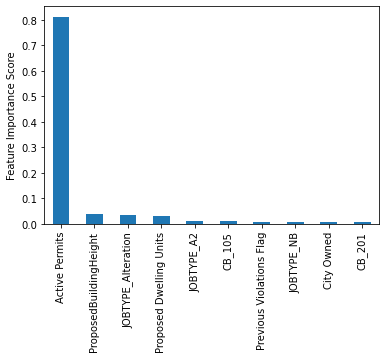

In [113]:
predictors=list(X_train)

(pd.Series(clf_model.feature_importances_, predictors).sort_values(ascending=False).nlargest(10).plot(kind='bar'))

plt.ylabel('Feature Importance Score')

***

### Hypertuning using GridSearch

In [135]:
#you provide grid_values the parameters for your ML model. Here since we are using GradientBoostingClassifier, we can
#provide all the different arguments that want it to use
classifier = GradientBoostingClassifier()
grid_values = {'learning_rate':[0.01, 0.1, 1], 'max_depth':[2,4,6,8,10], 'n_estimators':[100,250,500], 'random_state':[0]}
grid_clf_acc = GridSearchCV(classifier, param_grid=grid_values)

In [ ]:
grid_clf_acc.fit(X_train, y_train)
y_pred_acc = grid_clf_acc.predict(X_test)
confusion_matrix(y_test,y_pred_acc)

In [ ]:
print(classification_report(y_test, y_pred_acc))

In [117]:
# gridsearch_results = pd.DataFrame(grid_clf_acc.cv_results_)
# gridsearch_results

In [118]:
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred_acc))

# print(grid_clf_acc.cv_results_)
print(grid_clf_acc.best_params_)
print(grid_clf_acc.best_index_)
print(grid_clf_acc.best_score_)
print(grid_clf_acc.best_estimator_)


Confusion Matrix :
 [[238   2]
 [ 33 234]]
{'learning_rate': 1, 'max_depth': 8, 'n_estimators': 100, 'random_state': 0}
39
0.901327008453445
GradientBoostingClassifier(learning_rate=1, max_depth=8, random_state=0)


### Logistic Regression

In [119]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [120]:
LR_sample_dataset = X_test[:1]
LR_pred = LR_model.predict_proba(LR_sample_dataset)
print("Predictions Probability: ", LR_pred)

Predictions Probability:  [[0.4623786 0.5376214]]


In [121]:
LR_y_pred = LR_model.predict(X_test)
print(classification_report(y_test, LR_y_pred))

              precision    recall  f1-score   support

   HIGH RISK       0.92      0.70      0.79       240
    LOW RISK       0.78      0.94      0.85       267

    accuracy                           0.83       507
   macro avg       0.85      0.82      0.82       507
weighted avg       0.84      0.83      0.83       507



In [122]:
print("Confusion Matrix :\n",confusion_matrix(y_test, LR_y_pred))
print("\n")
print("Score : ", LR_model.score(X_test, y_test))

Confusion Matrix :
 [[168  72]
 [ 15 252]]


Score :  0.8284023668639053


### Neural Network

In [123]:
NN_model = MLPClassifier(
            solver='lbfgs', 
            alpha=1e-5, 
            hidden_layer_sizes=(12, 6), 
            random_state=1)
NN_model.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(12, 6), random_state=1,
              solver='lbfgs')

In [124]:
# ii. For a sample datapoint, predict the probabilities for each possible class
NN_sample_dataset = X_test[:1]
NN_pred = NN_model.predict_proba(NN_sample_dataset)
print("Predictions: ", NN_pred)

Predictions:  [[0.47937092 0.52062908]]


In [125]:
# iii. Report on the score for the Neural Network, what does the score measure?
NN_y_pred = NN_model.predict(X_test)
print(classification_report(y_test, NN_y_pred))

              precision    recall  f1-score   support

   HIGH RISK       0.87      0.75      0.81       240
    LOW RISK       0.80      0.90      0.85       267

    accuracy                           0.83       507
   macro avg       0.83      0.82      0.83       507
weighted avg       0.83      0.83      0.83       507



In [126]:
print("\nConfusion Matrix : \n",confusion_matrix(y_test, NN_y_pred))
print("\n")
NN_score = NN_model.score(X_test, y_test)
print("Score : ", NN_score)


Confusion Matrix : 
 [[180  60]
 [ 27 240]]


Score :  0.8284023668639053


### K-Nearest Neighbors

In [127]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [128]:
KNN_sample_dataset = X_test[:1]
KNN_pred = KNN_model.predict_proba(KNN_sample_dataset)
print("Predictions: ", NN_pred)

Predictions:  [[0.47937092 0.52062908]]


In [129]:
KNN_y_pred = KNN_model.predict(X_test)
print(classification_report(y_test, KNN_y_pred))

              precision    recall  f1-score   support

   HIGH RISK       0.79      0.95      0.86       240
    LOW RISK       0.95      0.77      0.85       267

    accuracy                           0.86       507
   macro avg       0.87      0.86      0.86       507
weighted avg       0.87      0.86      0.86       507



In [130]:
print("\nConfusion Matrix : \n",confusion_matrix(y_test, KNN_y_pred))
print("\n")
KNN_score = KNN_model.score(X_test, y_test)
print("Score : ", KNN_score)


Confusion Matrix : 
 [[229  11]
 [ 61 206]]


Score :  0.8579881656804734


### Support Vector Machine

In [131]:
SVM_model = svm.SVC(probability=True)
SVM_model.fit(X_train, y_train)

SVC(probability=True)

In [132]:
SVM_sample_dataset = X_test[:1]
SVM_pred = SVM_model.predict_proba(SVM_sample_dataset)
print("Predictions Probability: ", SVM_pred)

Predictions Probability:  [[0.2021794 0.7978206]]


In [133]:
SVM_y_pred = SVM_model.predict(X_test)
print(classification_report(y_test, SVM_y_pred))

              precision    recall  f1-score   support

   HIGH RISK       0.94      0.66      0.77       240
    LOW RISK       0.76      0.96      0.85       267

    accuracy                           0.82       507
   macro avg       0.85      0.81      0.81       507
weighted avg       0.84      0.82      0.81       507



In [134]:
print("\nConfusion Matrix : \n",confusion_matrix(y_test, SVM_y_pred))
print("\n")
SVM_score = SVM_model.score(X_test, y_test)
print("Score : ", SVM_score)


Confusion Matrix : 
 [[158  82]
 [ 10 257]]


Score :  0.8185404339250493
